The data set is a vehicle insurance claim fraud detection. The aim of this to build a model that determines if a certain transcation is fraudulent or not. 

The two major steps in this is 

1. Determine the major drivers of fraud detection. Which variables are the tellers of if a claim in fradulent or not 
2. Predict if a transaction is fraudlent or not 


For this we are carrying out the following stages 
1. EDA
2. model development 
3. Model evaluation
4. Conclusion


The first step of EDA is to import and clean the data

In [1]:
#import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score
 

In [2]:
#import the data 
data = pd.read_csv('https://raw.githubusercontent.com/Pelumioluwa/MBAN6110Class/main/Data/fraud_oracle.csv')
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [3]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

The column dictionary for the data is 
'Month' - Month of accident
'WeekOfMonth' - Week of accident in month
'DayOfWeek' - Day of week of accident
'Make' - Model of car 
'AccidentArea' - category of where accident occured
'DayOfWeekClaimed' - Day of week of claim
'MonthClaimed' - Month of claim
'WeekOfMonthClaimed' - Day of week of claim
'Sex' -  gender of claimer
'MaritalStatus' - martial status of claimer
'Age' - age of claim
'Fault' - whose fault the accident was 
'PolicyType' - Type of policy
'VehicleCategory' - vehicle category 
'VehiclePrice' - cost of vehicle
'FraudFound_P' - fraud or not 
'PolicyNumber' - policy number 
'RepNumber', - representative number 
'Deductible' - amount deductible 
'DriverRating' - rating of the driver
'Days_Policy_Accident' - days in the policy accident
'Days_Policy_Claim' - days for policy claim
'PastNumberOfClaims' -  number of past claims
'AgeOfVehicle' - age of vehicle
'AgeOfPolicyHolder' - age of policy holder
'PoliceReportFiled' - any police report filed
'WitnessPresent' - any witness present
'AgentType' - agent type
'NumberOfSuppliments' - number of supplement 
'AddressChange_Claim' - any address change in claim
'NumberOfCars' - number of cars in the accident
'Year' - year of occurance 
'BasePolicy' - base policy applicable 

Conduct basic exploratory analysis 
1. get summary of the dataset 
2. Check the datatype of data column - everything is good
3. check for missing values - No missing values 
4. check for duplicates 
5. check for outliers 
6. check the distrubtion of columns in data set (cardio vascular)
7. plot correlation matrix (address only numerical)
8. visualize relationship (plot pairplot for numerical, plot the line graphs below for categorical)
9. Do only percentage for categorical
10. carry out feature engineering 
11. build pipeline to convert to dummy 
12. build dummy models and evalute them all
13. optimize models 
14. evaluate models 
15. Translate conclusions, make recommendations based on conclusion and  develop plans on how to use the recommendations



In [4]:
#check for missing values and datatype for each data column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
#get summary of the dataset  
#uniques day of week claimed is 8 days instead 7 , same for monthclaimed is 13
data.describe(include='all')

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
count,15420,15420.000000,15420,15420,15420,15420,15420,15420.000000,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420.000000,15420
unique,12,NaN,7,19,2,8,13,NaN,2,4,...,8,9,2,2,2,4,5,5,NaN,3
top,Jan,NaN,Monday,Pontiac,Urban,Monday,Jan,NaN,Male,Married,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,NaN,Collision
freq,1411,NaN,2616,3837,13822,3757,1446,NaN,13000,10625,...,5807,5593,14992,15333,15179,7047,14324,14316,NaN,5962
mean,NaN,2.788586,NaN,NaN,NaN,NaN,NaN,2.693969,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.866472,NaN
std,NaN,1.287585,NaN,NaN,NaN,NaN,NaN,1.259115,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.803313,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN
25%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN
50%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN
75%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,NaN


In [20]:
#investigating 8 day of week claim 
data['DayOfWeekClaimed'].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday', '0'], dtype=object)

In [23]:
#investigating 13 month of claim 
data['MonthClaimed'].unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct', '0'], dtype=object)

In [26]:
#find the day of week where it is 0
data[data['DayOfWeekClaimed']== '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [24]:
#find the month where it is 0
data[data['MonthClaimed']== '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [27]:
#because both errors are the same row, we drop the data
#drop the error
data.drop(1516, axis=0, inplace=True )

In [29]:
#get a column that have only unique values to check for duplicates 
len(data['PolicyNumber'].unique())

15419

In [35]:
#check for duplicates 
dup = data['PolicyNumber'].duplicated().any()
print(dup)

False


<AxesSubplot:xlabel='FraudFound_P', ylabel='WeekOfMonth'>

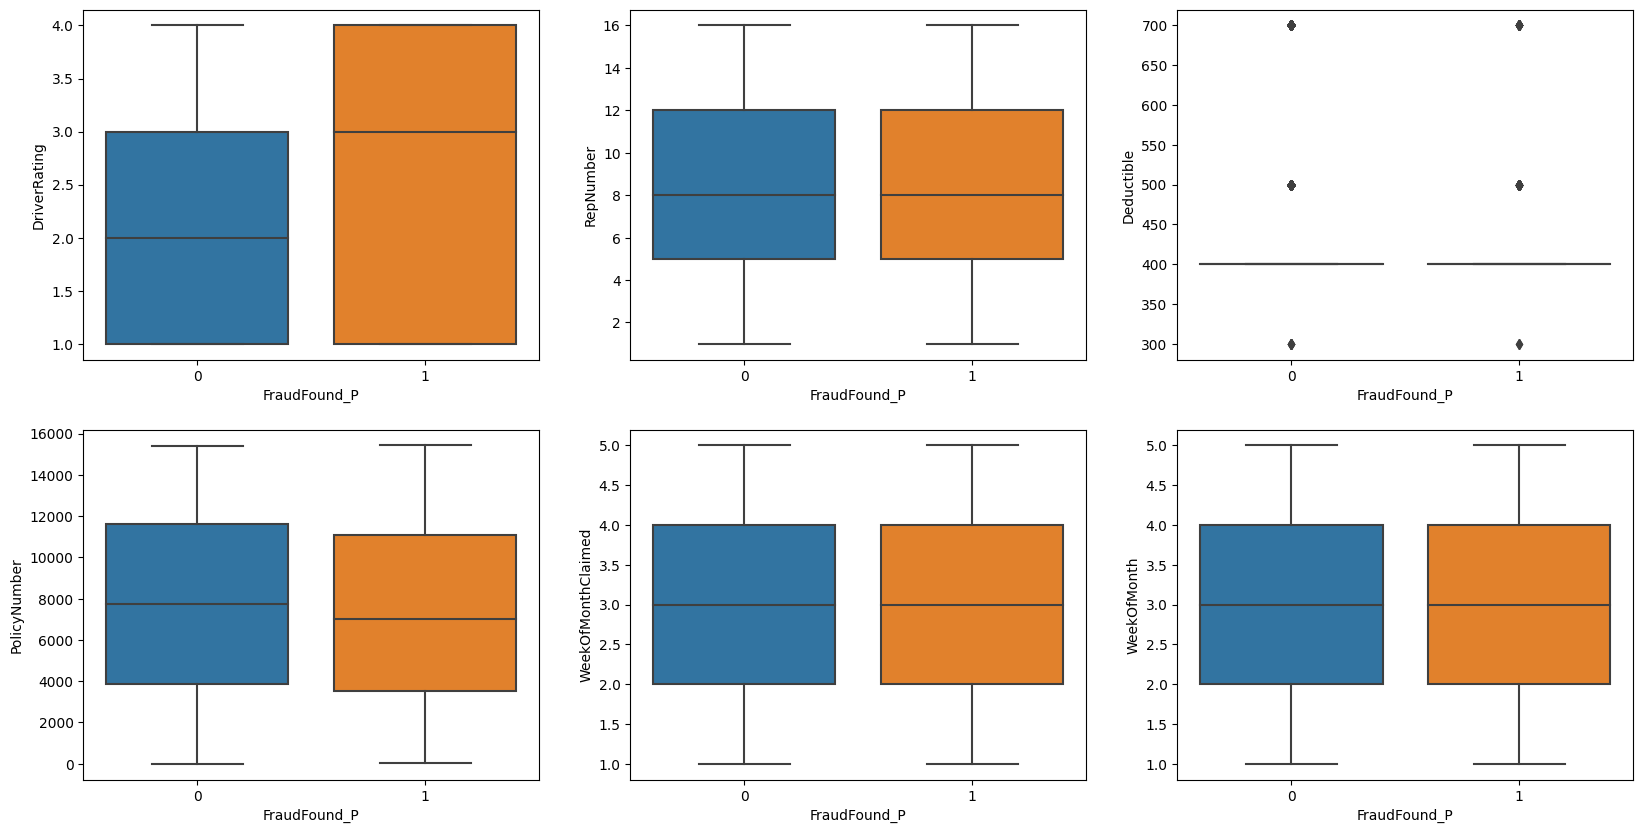

In [36]:
#check for outliers 
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='FraudFound_P', y='DriverRating', ax=ax1, data=data)
sns.boxplot(x='FraudFound_P', y='RepNumber', ax=ax2, data=data)
sns.boxplot(x='FraudFound_P', y='Deductible', ax=ax3, data=data)
sns.boxplot(x='FraudFound_P', y='PolicyNumber', ax=ax4, data=data)
sns.boxplot(x='FraudFound_P', y='WeekOfMonthClaimed', ax=ax5, data=data)
sns.boxplot(x='FraudFound_P', y='WeekOfMonth', ax=ax6, data=data)

In [38]:
#check the outliers
data[data['Deductible']<= 300]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
3213,Feb,5,Monday,Honda,Urban,Tuesday,Mar,1,Male,Single,...,new,16 to 17,No,No,External,none,2 to 3 years,2 vehicles,1994,Collision
5661,Feb,3,Monday,Chevrolet,Urban,Tuesday,Feb,4,Female,Married,...,2 years,41 to 50,No,No,External,none,2 to 3 years,1 vehicle,1994,All Perils
7395,Nov,3,Monday,Mazda,Urban,Wednesday,Nov,3,Male,Married,...,5 years,31 to 35,No,No,External,none,2 to 3 years,1 vehicle,1995,All Perils
9435,Aug,2,Monday,Toyota,Urban,Wednesday,Aug,2,Male,Single,...,5 years,26 to 30,No,No,External,none,2 to 3 years,1 vehicle,1995,Liability
9690,Dec,2,Wednesday,Honda,Urban,Friday,Dec,3,Male,Married,...,4 years,31 to 35,No,No,External,none,2 to 3 years,1 vehicle,1995,Collision
14331,Sep,3,Monday,Toyota,Urban,Tuesday,Sep,3,Female,Single,...,5 years,31 to 35,No,No,External,none,2 to 3 years,1 vehicle,1996,Liability
14943,Nov,4,Wednesday,Dodge,Urban,Thursday,Nov,4,Male,Single,...,5 years,26 to 30,No,No,External,none,2 to 3 years,1 vehicle,1996,Collision


In [47]:
#check the outliers
data[data['Deductible']>= 700]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
93,Aug,4,Saturday,Pontiac,Urban,Monday,Aug,5,Male,Married,...,7 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,1994,Collision
217,Jan,5,Tuesday,Mazda,Urban,Tuesday,Jan,5,Male,Married,...,more than 7,over 65,No,No,External,1 to 2,no change,1 vehicle,1994,Liability
248,Feb,3,Friday,Toyota,Urban,Monday,Feb,3,Male,Single,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
341,Sep,4,Sunday,Toyota,Urban,Tuesday,Oct,2,Male,Married,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
372,Sep,2,Tuesday,Chevrolet,Rural,Wednesday,Sep,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283,Oct,2,Wednesday,Chevrolet,Urban,Friday,Oct,3,Male,Married,...,more than 7,36 to 40,No,No,External,none,no change,1 vehicle,1996,All Perils
15314,Jan,5,Saturday,Pontiac,Urban,Monday,Jan,5,Female,Single,...,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1996,Liability
15345,Nov,2,Tuesday,Chevrolet,Urban,Friday,Nov,3,Male,Married,...,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1996,Collision
15376,Jan,3,Friday,Ford,Urban,Thursday,Jan,3,Male,Married,...,7 years,41 to 50,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [39]:
#describe the decuctible column before dropping the 8 rows 
data['Deductible'].describe(include='all')

count    15419.000000
mean       407.704780
std         43.952379
min        300.000000
25%        400.000000
50%        400.000000
75%        400.000000
max        700.000000
Name: Deductible, dtype: float64

In [48]:
#drop the 8 rows with 300 and below. there is only a slight change in the mean
#and no change in the median
data.drop([0,3213,5661,7395,9435,9690,14331,14943], axis=0, inplace=True )
data['Deductible'].describe(include='all')

count    15411.000000
mean       407.760690
std         43.895207
min        400.000000
25%        400.000000
50%        400.000000
75%        400.000000
max        700.000000
Name: Deductible, dtype: float64

<AxesSubplot:xlabel='FraudFound_P', ylabel='WeekOfMonth'>

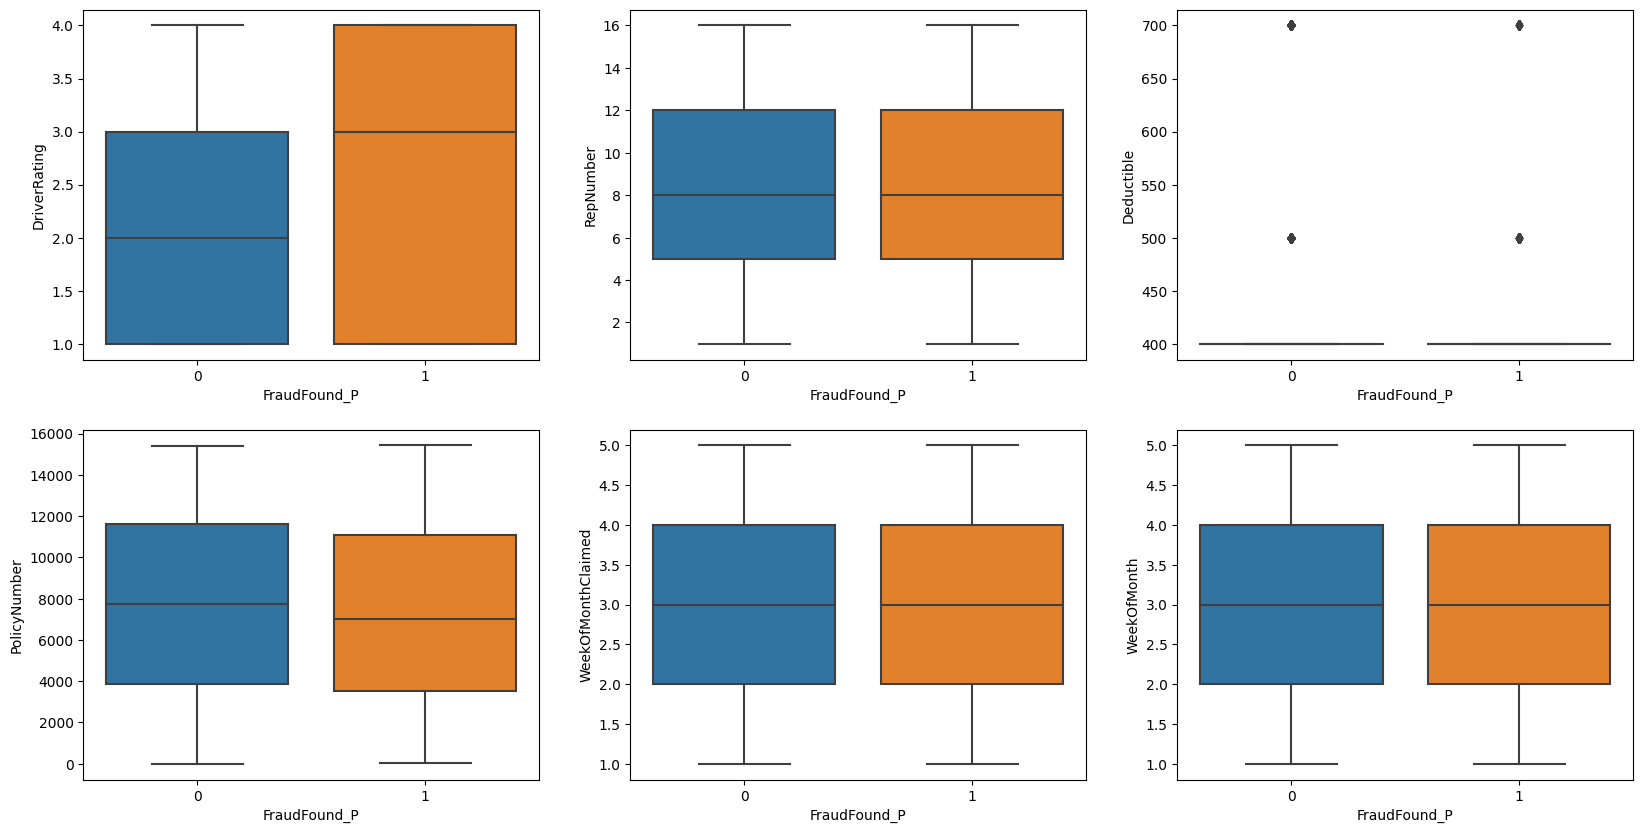

In [49]:
#check for outliers 
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='FraudFound_P', y='DriverRating', ax=ax1, data=data)
sns.boxplot(x='FraudFound_P', y='RepNumber', ax=ax2, data=data)
sns.boxplot(x='FraudFound_P', y='Deductible', ax=ax3, data=data)
sns.boxplot(x='FraudFound_P', y='PolicyNumber', ax=ax4, data=data)
sns.boxplot(x='FraudFound_P', y='WeekOfMonthClaimed', ax=ax5, data=data)
sns.boxplot(x='FraudFound_P', y='WeekOfMonth', ax=ax6, data=data)

In [61]:
data['Deductible'].unique()

array([400, 500, 700])

In [66]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

Divide the data into people data, policy, vehicle, claim
 'FraudFound_P'
people('MaritalStatus','DriverRating','NumberOfCars','Sex','PastNumberOfClaims','AddressChange_Claim')
policy('PolicyNumber','Days_Policy_Claim''AgeOfPolicyHolder','NumberOfSuppliments','BasePolicy','PolicyType','RepNumber','Deductible')
Vehicle('Make','AgeOfVehicle','VehicleCategory','VehiclePrice')
claim('DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Age','AgentType')
accident('Month', 'WeekOfMonth', 'DayOfWeek','AccidentArea','WitnessPresent','PoliceReportFiled','Days_Policy_Accident','Fault','Year')

In [70]:
data['BasePolicy'].unique()

array(['Collision', 'Liability', 'All Perils'], dtype=object)

<AxesSubplot:xlabel='AccidentArea', ylabel='MaritalStatus'>

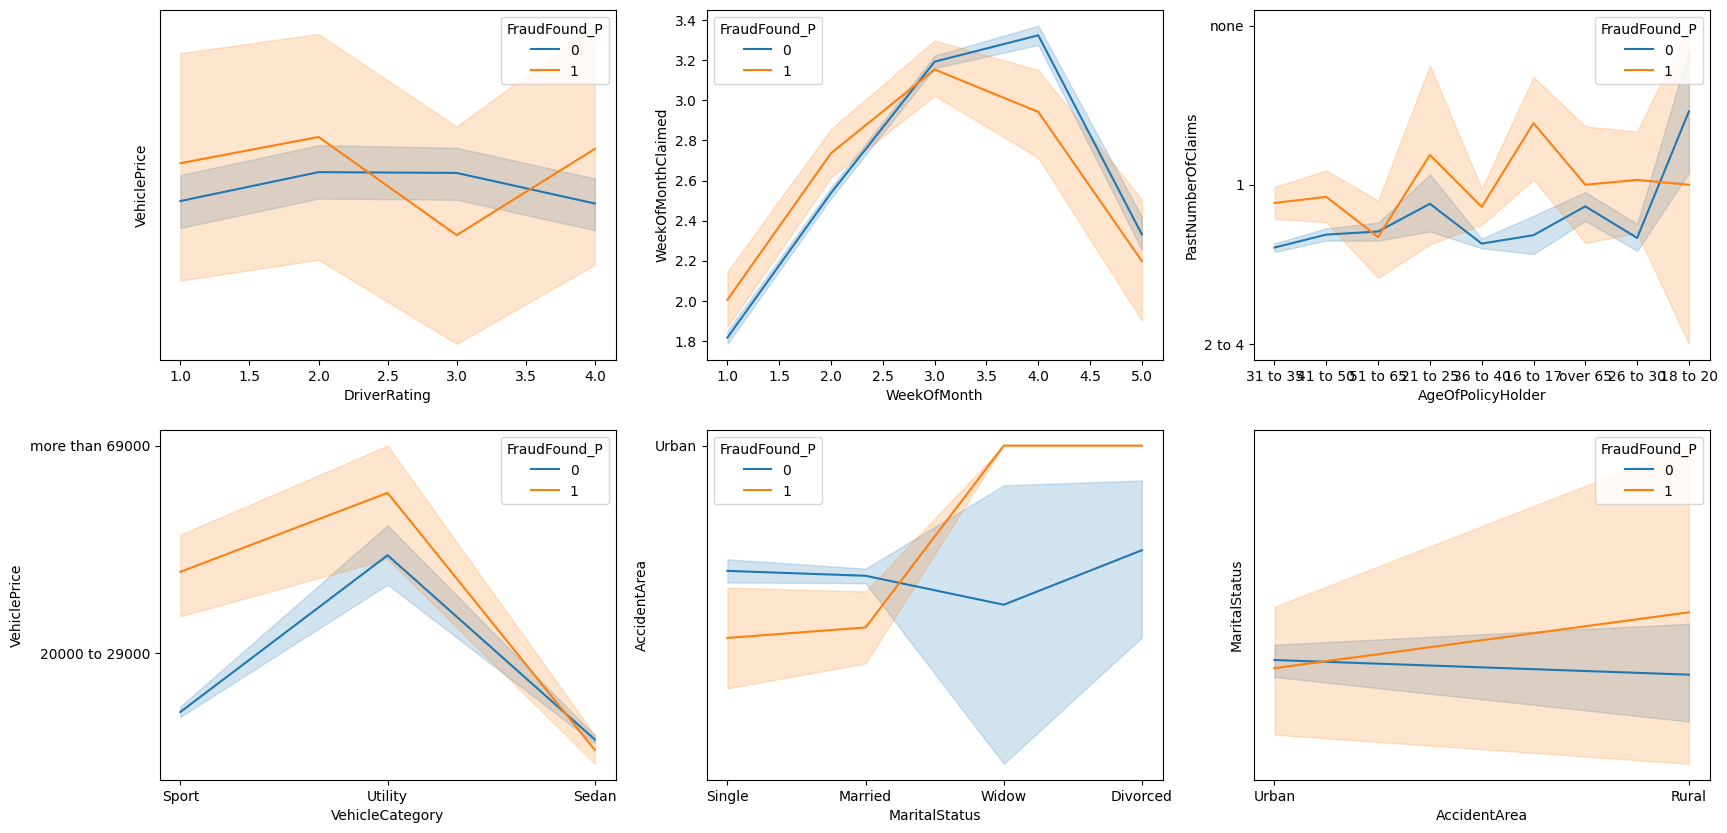

In [74]:
#Explore data to see the trend 
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(x='DriverRating', y='VehiclePrice', ax=ax1, data=data, hue='FraudFound_P')
sns.lineplot(x='WeekOfMonth', y='WeekOfMonthClaimed', ax=ax2, data=data, hue='FraudFound_P')
sns.lineplot(x='AgeOfPolicyHolder', y='PastNumberOfClaims', ax=ax3, data=data, hue='FraudFound_P')
sns.lineplot(x='VehicleCategory', y='VehiclePrice', ax=ax4, data=data, hue='FraudFound_P')
sns.lineplot(x='MaritalStatus', y='AccidentArea', ax=ax5, data=data, hue='FraudFound_P')
sns.lineplot(x='AccidentArea', y='MaritalStatus', ax=ax6, data=data, hue='FraudFound_P')

Feature engineering 
conversion to dummy data
scaling numerical data 
conversion of data based on relationship 

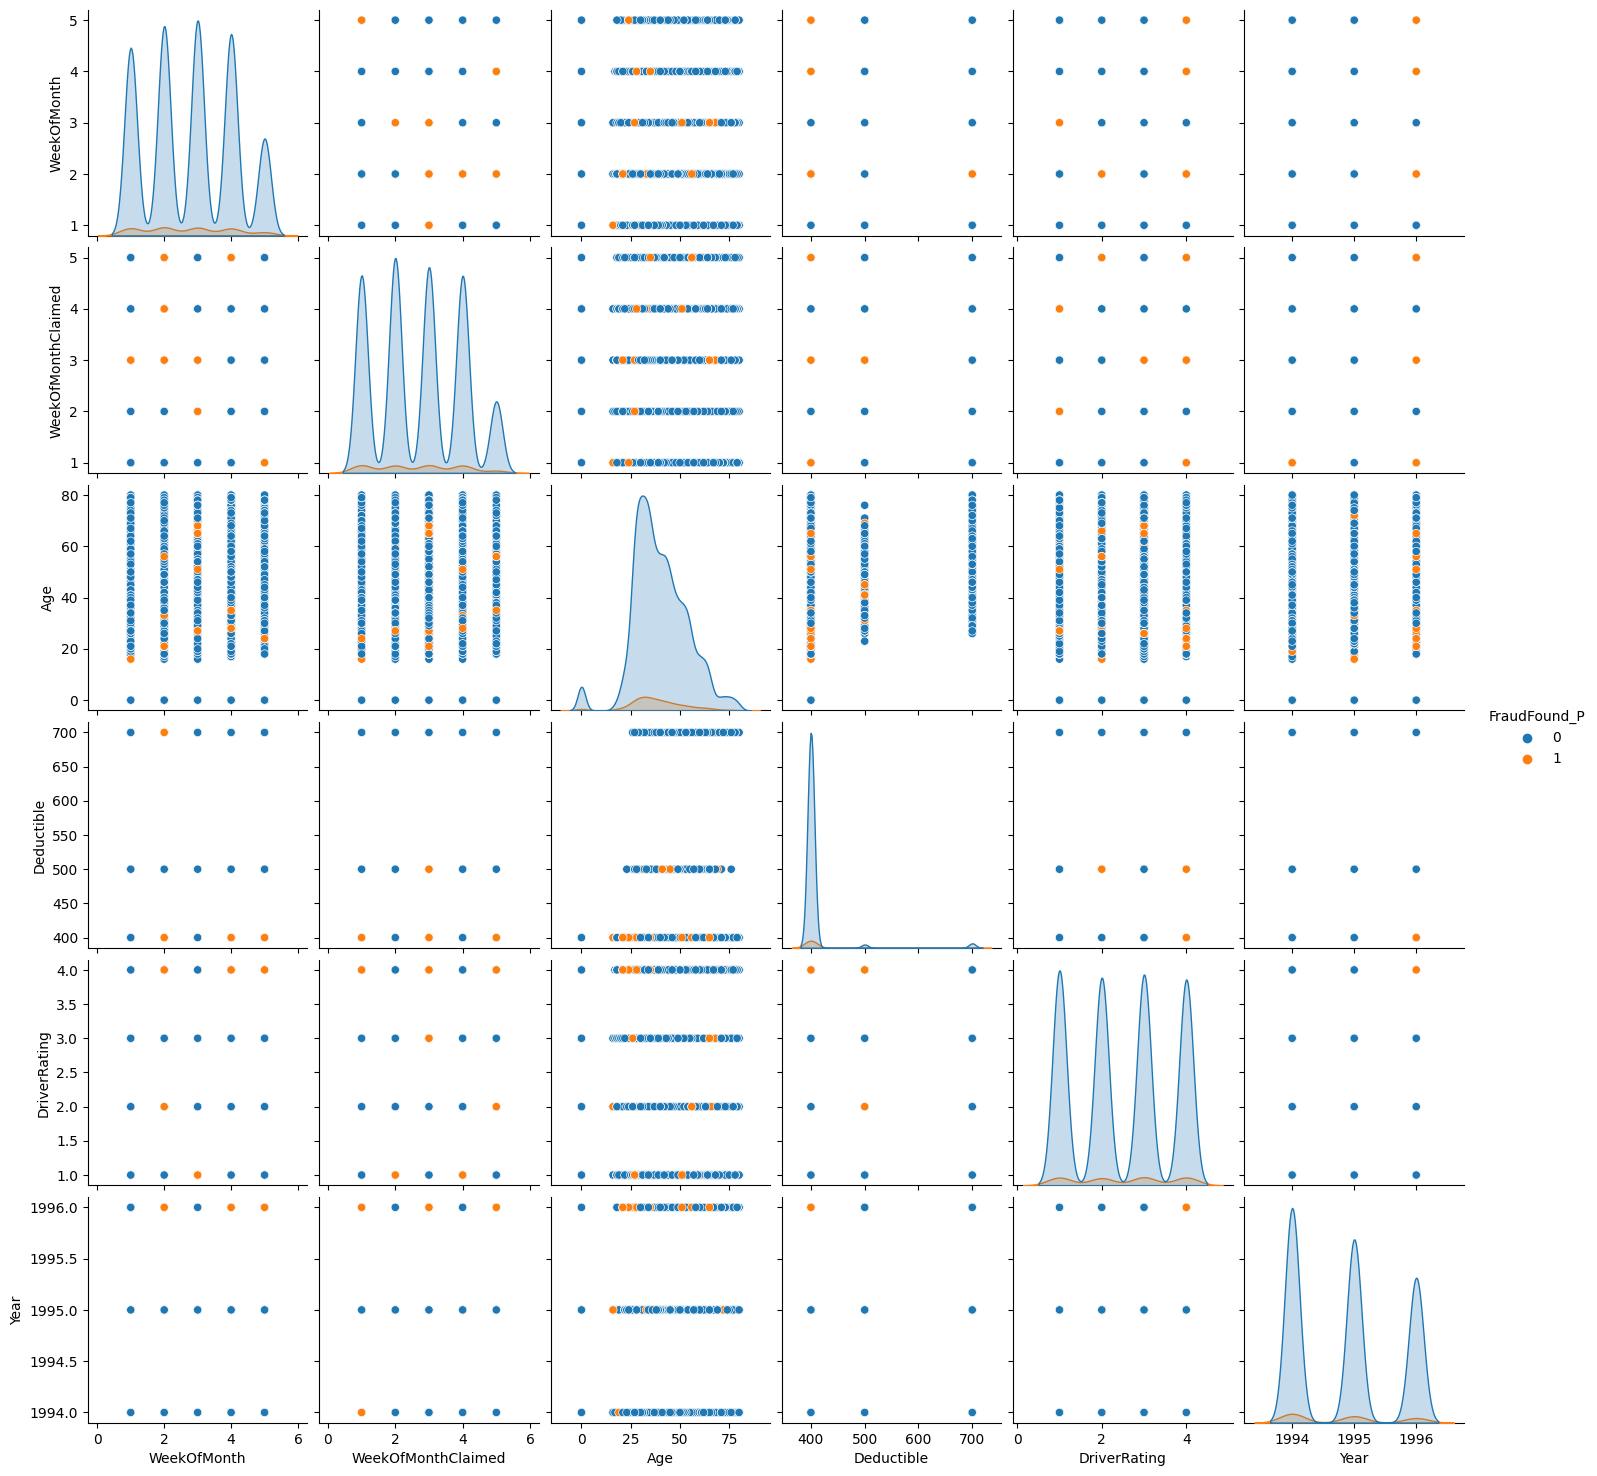

In [77]:
#plot a pair plot graph 
num_col = ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice','Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled','FraudFound_P',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy']
sns.pairplot(data[num_col],hue='FraudFound_P')

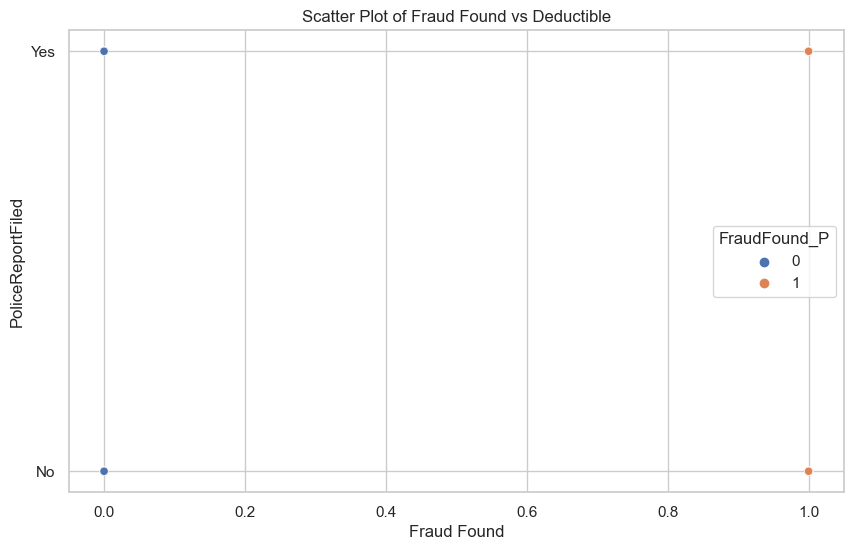

In [80]:
# Assuming 'data' is your DataFrame containing the data
sns.set(style="whitegrid")  # Set the style if you prefer

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FraudFound_P', y='PoliceReportFiled', data=data,hue='FraudFound_P')

plt.title('Scatter Plot of Fraud Found vs Deductible')
plt.xlabel('Fraud Found')
plt.ylabel('PoliceReportFiled')

plt.show()

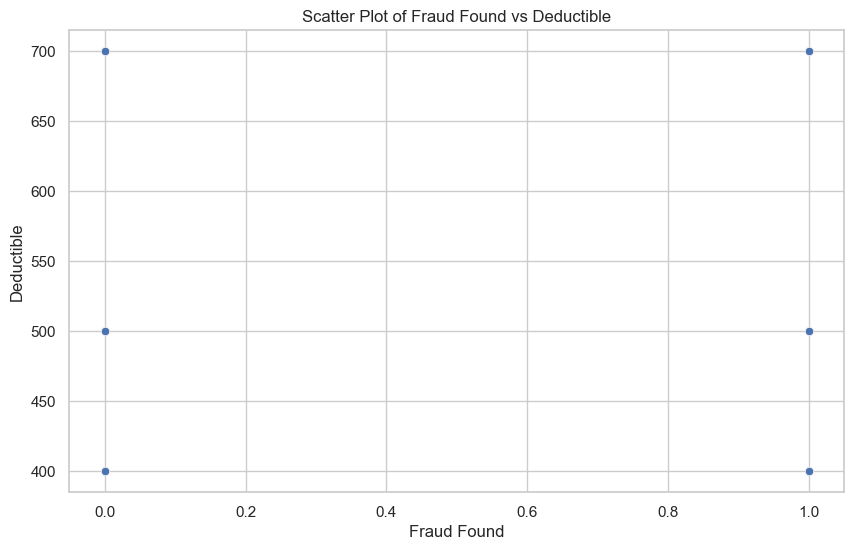

In [81]:
# Assuming 'data' is your DataFrame containing the data
sns.set(style="whitegrid")  # Set the style if you prefer

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FraudFound_P', y='Deductible', data=data)

plt.title('Scatter Plot of Fraud Found vs Deductible')
plt.xlabel('Fraud Found')
plt.ylabel('Deductible')

plt.show()